In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from data_loader import*
import implementations
import test_utils

# 1. Data loading

In [3]:
ids, data, pred = load_data("train.csv")
perc = np.count_nonzero(pred)/len(pred)
print("The percentage of Boson events in this set is: ", perc)

The percentage of Boson events in this set is:  0.342668


In [4]:
""" Here we try to clean the data """
# we could do something like: if a column is made of more then 90% of -999, we eliminate that column, and hence condense the array "data". The same
# could be done with rows (data points). Then, we can run other few lines of code to substitute the remaining -999 with the mean value for that feature
# in this way we should obtain usable data


# initially, we have 29 columns
num = 0.7        # this is the parameter through which we decide to eliminate a column or not. with 0.7 we lose 7 columns
length = data.shape[1]  
i = 0
while True:
    count = data[:,i][data[:,i]==-999].shape[0] 
    tot = num*len(data[:,i])        
    if count >= tot:
        data = np.delete(data, i, 1)      # the 1 stands for column
    else:
        i = i+1
    
    if i >=  data.shape[1]:
        break

        
# Now we will try to substitute the remaining -999 values with the average value in that column    
for i in range (0, data.shape[1]):
    
    # Everytime we get to a new column, we set count and sum to 0
    count = 0;
    Sum = 0;
    
    for j in range(0, data.shape[0]):
        if (data[j][i] == -999):       
            continue
        else:
            Sum += data[j][i]
            count += 1
            
    average = Sum / count
    
    # Now we insert the average value in every position where a -999 is located
    for j in range(0, data.shape[0]):
        if (data[j][i] == -999):
            data[j][i] = average
        

# USEFUL PRINTS:
# print(data.shape[0])
# print(data.shape[1])
# print(pred)
# data.shape[0]

# Let's quickly check whether there are any -999 left in the data matrix
#count = 0
#for i in range (0, data.shape[1]):
#    for j in range (0, data.shape[0]):
#        if (data[j][i] == -999):
#            count += 1
            
#print(count)
#print(data)


In [5]:
np.savetxt("check_data_matrix.csv", data, header='', delimiter=",")

In [6]:
train_df, train_DER_df, train_PRI_df = load_training_dataframe()

In [8]:
train_df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


# 2. Data visualization

In [30]:
import plots

In [10]:
train_df.isna().sum()

Id                             0
Prediction                     0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_su

In [11]:
(train_df == -999).sum()

Id                                  0
Prediction                          0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_lead

/Users/titouanbrossy/Project_1_ML/plots.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6), dpi=80)


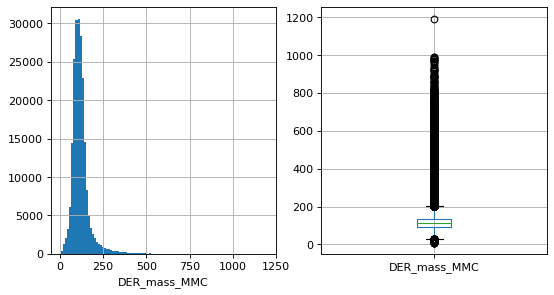

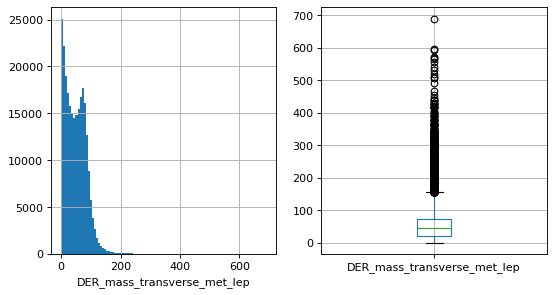

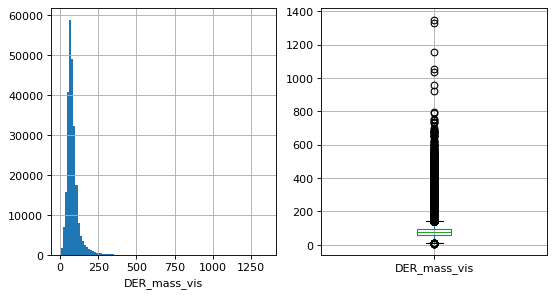

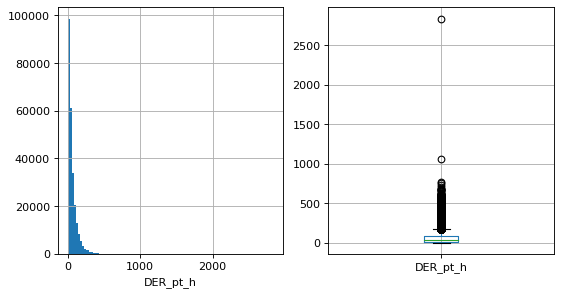

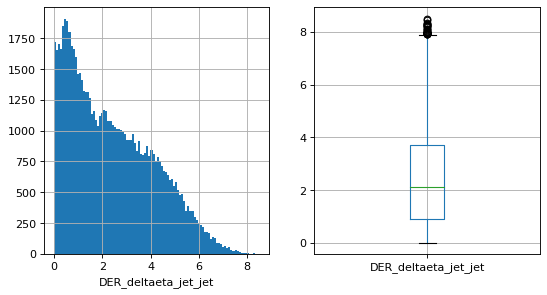

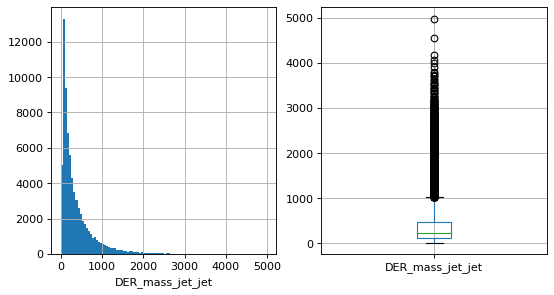

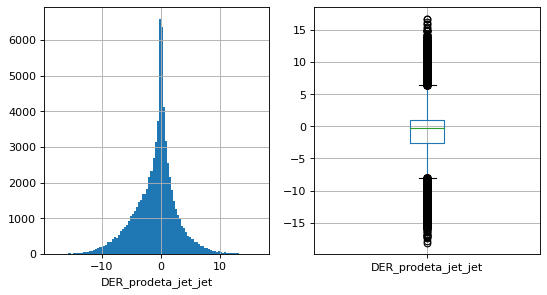

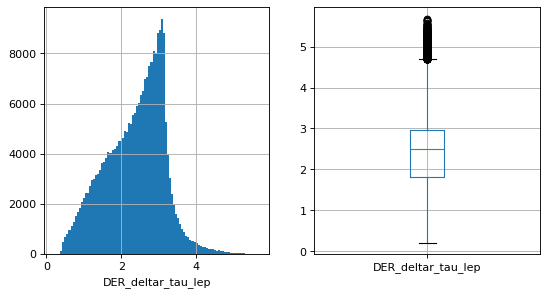

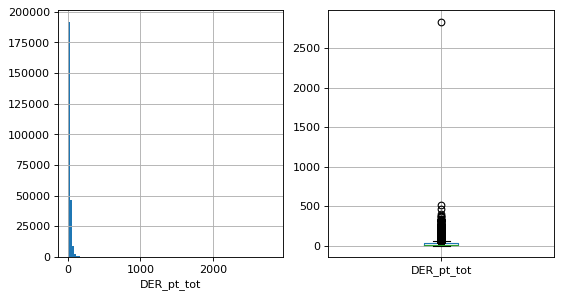

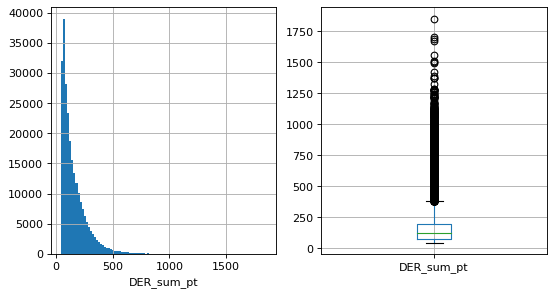

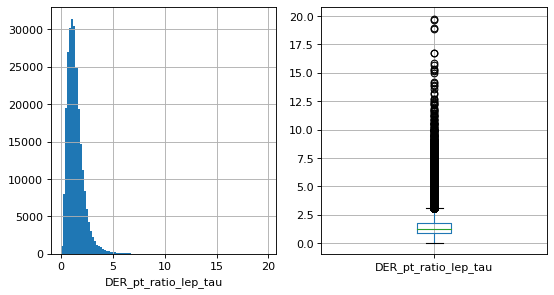

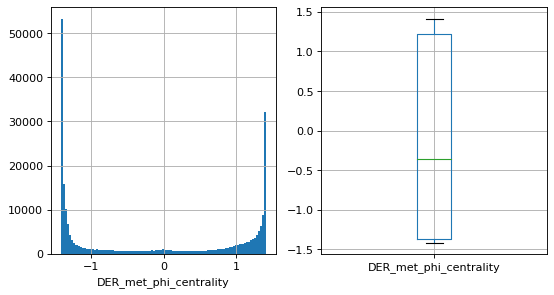

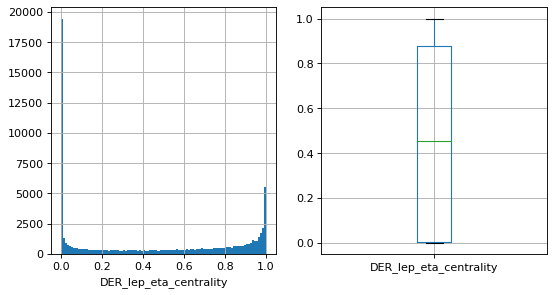

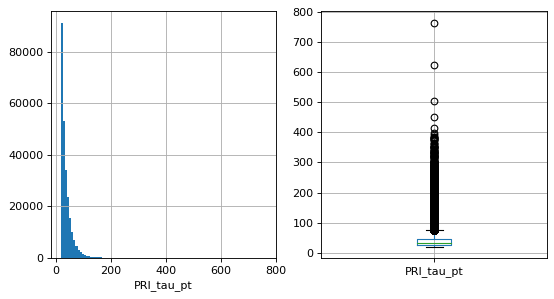

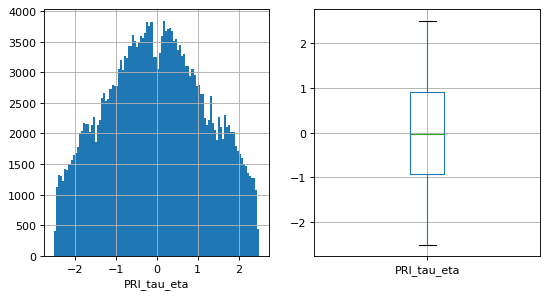

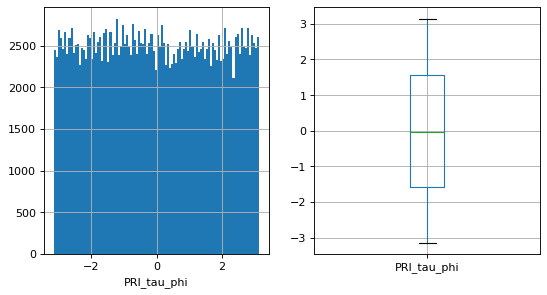

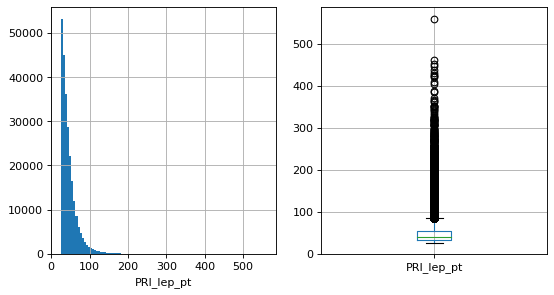

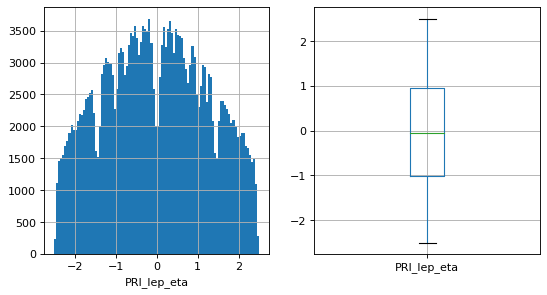

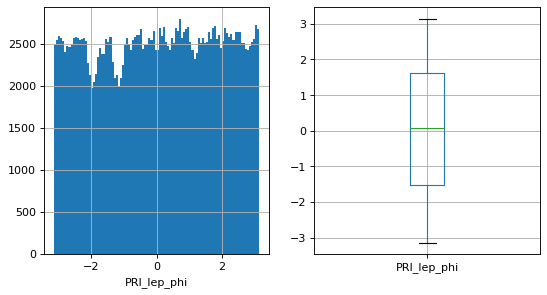

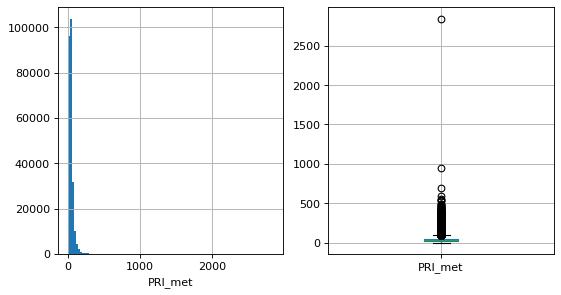

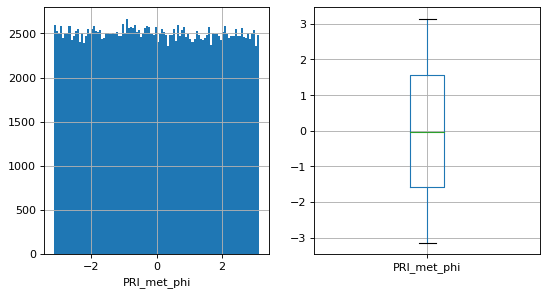

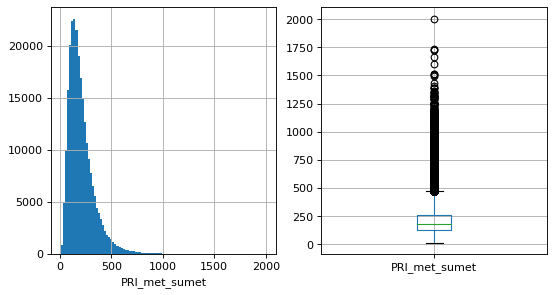

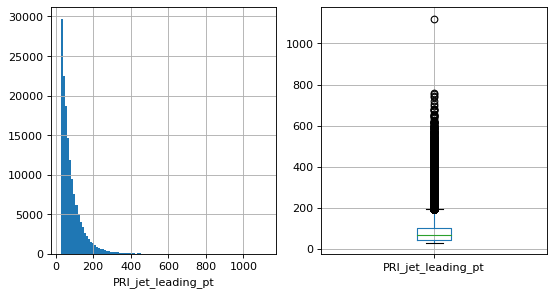

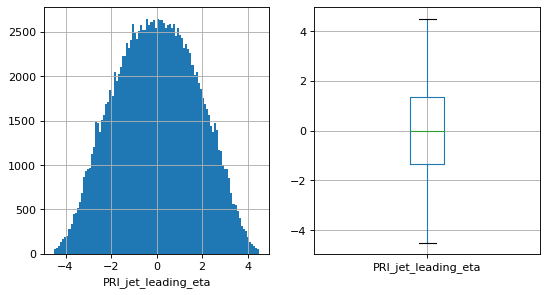

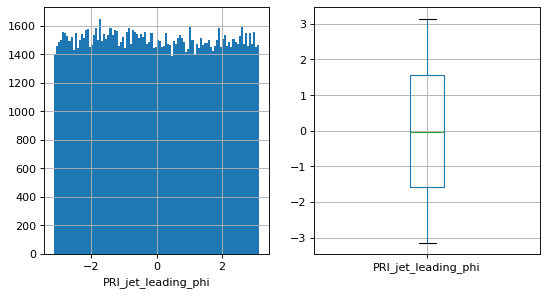

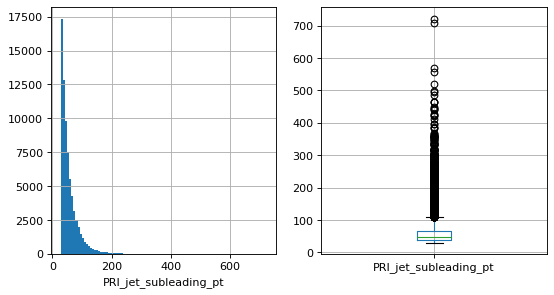

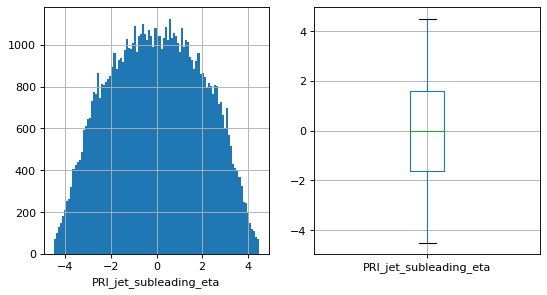

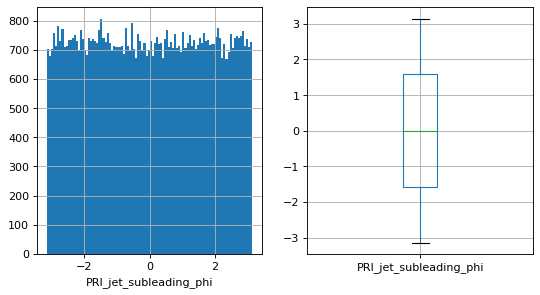

In [38]:
plots.features_distribution(list(train_df.drop(['Id','Prediction', 'PRI_jet_all_pt', 'PRI_jet_num'],
                                                                     axis=1).columns),train_df)

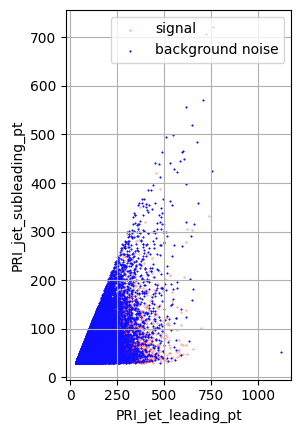

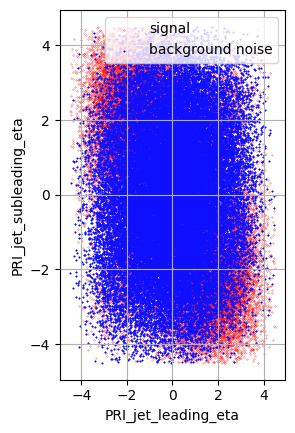

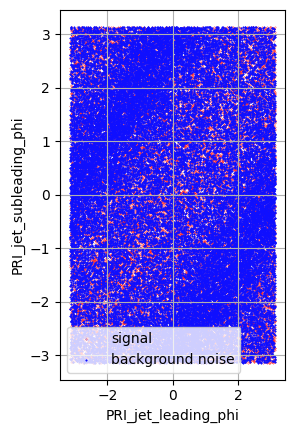

In [56]:
Features_1 = ['PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi']
Features_2 = ['PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi']
for feature_1,feature_2 in zip(Features_1,Features_2):
    plots.features_visualization(feature_1, feature_2, train_df)

# 3. Data processing

In [52]:
from data_processing import*

In [53]:
processed_train_df_1 = train_df

In [55]:
Names=list(train_df.drop(['Id','Prediction', 'PRI_jet_num'], axis=1).columns)
Names_undefined = ['DER_mass_MMC','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet',
                   'DER_lep_eta_centrality','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi',
                   'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt']

In [60]:
one_hot_encoding(processed_train_df_1, number_of_bins=4)
handle_outliers(processed_train_df_1,Names)
handle_undefined_values(processed_train_df_1,Names_undefined)
standardize(processed_train_df_1)

In [61]:
processed_train_df_1.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_jet_numencoding_0,PRI_jet_numencoding_1,PRI_jet_numencoding_2,PRI_jet_num_encoding_<=1,DER_mass_MMC_encoding_undefined
0,100000,s,-0.003376,-0.003647,-0.004694,-0.003069,2.406582e+10,-0.000535,0.016345,3.126185e+11,...,-9.372698e+12,-0.00565,-2.912142e+14,-6.259899e+14,-0.001813,0,0,0,0,0
1,100001,b,-0.003376,-0.003647,-0.004694,-0.003069,2.406582e+10,-0.000535,0.016345,3.126185e+11,...,-9.372698e+12,-0.00565,-2.912142e+14,-6.259899e+14,-0.001813,0,0,0,0,0
2,100002,b,-0.003376,-0.003647,-0.004694,-0.003069,2.406582e+10,-0.000535,0.016345,3.126185e+11,...,-9.372698e+12,-0.00565,-2.912142e+14,-6.259899e+14,-0.001813,0,0,0,0,0
3,100003,b,-0.003376,-0.003647,-0.004694,-0.003069,2.406582e+10,-0.000535,0.016345,3.126185e+11,...,-9.372698e+12,-0.00565,-2.912142e+14,-6.259899e+14,-0.001813,0,0,0,0,0
4,100004,b,-0.003376,-0.003647,-0.004694,-0.003069,2.406582e+10,-0.000535,0.016345,3.126185e+11,...,-9.372698e+12,-0.00565,-2.912142e+14,-6.259899e+14,-0.001813,0,0,0,0,0


# 4. Model selection

## 4.1 Least squares with gradient descent

## 4.2 Least squares with stochastic gradient descent

## 4.3 Least squares with normal equations

## 4.4 Ridge regression with normal equations

## 4.5 Logistic regression with gradient descent

## 4.6 Regularized logistic regression with gradient descent